In [1]:
import sys
sys.path.append('..')
from src.pomdp import *
from src.mdp import VI_Solver

In [2]:
import numpy as np
import random

# POMDP Toy Problem

Symmetric 2 state, 2 action model

## Model definition

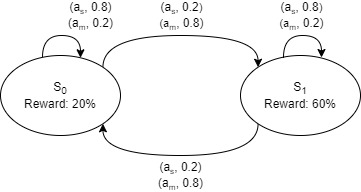

In [3]:
ACTION_COUNT = 2
STATE_COUNT = 2

In [4]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + a) % STATE_COUNT
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.8, 0.2],
       [0.2, 0.8]])

In [5]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7, 0.3],
       [0.3, 0.7]])

In [6]:
REWARD_PROBS = [0.2, 0.6]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p] = REWARD_PROBS[s_p]
        
reward_table

array([[[0.2, 0.6],
        [0.2, 0.6]],

       [[0.2, 0.6],
        [0.2, 0.6]]])

In [7]:
states = ['s0','s1']
actions = ['stay', 'move']
observations = ['s0', 's1']

model = POMDP_Model(states, actions, observations, transition_table, reward_table, observation_table)

## Solving

In [8]:
solver = PBVI_Solver(model)

In [9]:
value_function = solver.solve(9,10,eps=0.001)

Converged early...


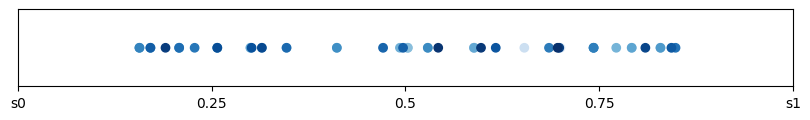

In [10]:
solver.plot_belief_set(10)

In [11]:
value_function

[AlphaVector([4.30541681, 4.54541681]),
 AlphaVector([4.54596598, 4.30472146]),
 AlphaVector([4.30472146, 4.54596598]),
 AlphaVector([4.54747466, 4.30068075]),
 AlphaVector([4.30068075, 4.54747466]),
 AlphaVector([4.54593551, 4.30477157]),
 AlphaVector([4.28007435, 4.55252906]),
 AlphaVector([4.30477157, 4.54593551]),
 AlphaVector([4.55252906, 4.28007435]),
 AlphaVector([4.54541681, 4.30541681]),
 AlphaVector([4.30473196, 4.54596058]),
 AlphaVector([4.17207435, 4.57412906]),
 AlphaVector([4.54596058, 4.30473196]),
 AlphaVector([4.30090734, 4.54740065]),
 AlphaVector([4.54740065, 4.30090734]),
 AlphaVector([4.57412906, 4.17207435])]

<Figure size 600x400 with 0 Axes>

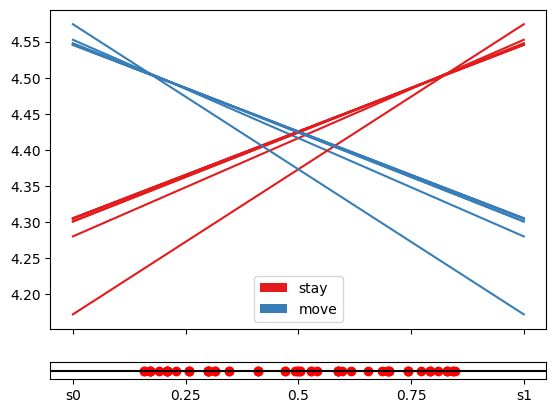

In [12]:
solver.plot_solution(4)

In [13]:
solver.save_history_video()

[]
0
1
Video saved at 'Results/s2-a2-ssea-g0.9-e0.001-20230820_002116.mp4'...


## MDP Version of the probelm

In [14]:
vi_solver = VI_Solver(model)

In [17]:
vi_solver.solve(gamma=0.9)

[AlphaVector([4.95150374, 5.19150374]), AlphaVector([5.19150374, 4.95150374])]

In [18]:
solver.save_history_video(custom_name='comparison', compare_with=vi_solver)

[]
0
2
Video saved at 'Results/comparison-s2-a2-ssea-g0.9-e0.001-20230820_002116.mp4'...
